Enter the number of processes: 5

Enter details for Process 1:
PID: 1
Arrival Time: 3
Burst Time: 4
Priority (0 for this implementation): 0

Enter details for Process 2:
PID: 2
Arrival Time: 0
Burst Time: 3
Priority (0 for this implementation): 0

Enter details for Process 3:
PID: 3
Arrival Time: 2
Burst Time: 6
Priority (0 for this implementation): 0

Enter details for Process 4:
PID: 4
Arrival Time: 4
Burst Time: 7
Priority (0 for this implementation): 0

Enter details for Process 5:
PID: 5
Arrival Time: 6
Burst Time: 8
Priority (0 for this implementation): 0

Enter Time Quantum for Queue 1: 1
Enter Time Quantum for Queue 2: 1
Enter Time Quantum for Queue 3: 1

Time 0:
Queue 1: [2]
Queue 2: []
Queue 3: []

Time 1:
Queue 1: [2]
Queue 2: []
Queue 3: []

Time 2:
Queue 1: [3]
Queue 2: [2]
Queue 3: []

Time 3:
Queue 1: [1]
Queue 2: [2, 3]
Queue 3: []

Time 4:
Queue 1: [4]
Queue 2: [2, 3, 1]
Queue 3: []

Time 5:
Queue 1: []
Queue 2: [2, 3, 1, 4]
Queue 3: []

Time 6:
Queue 1: [5]
Queue 2: [

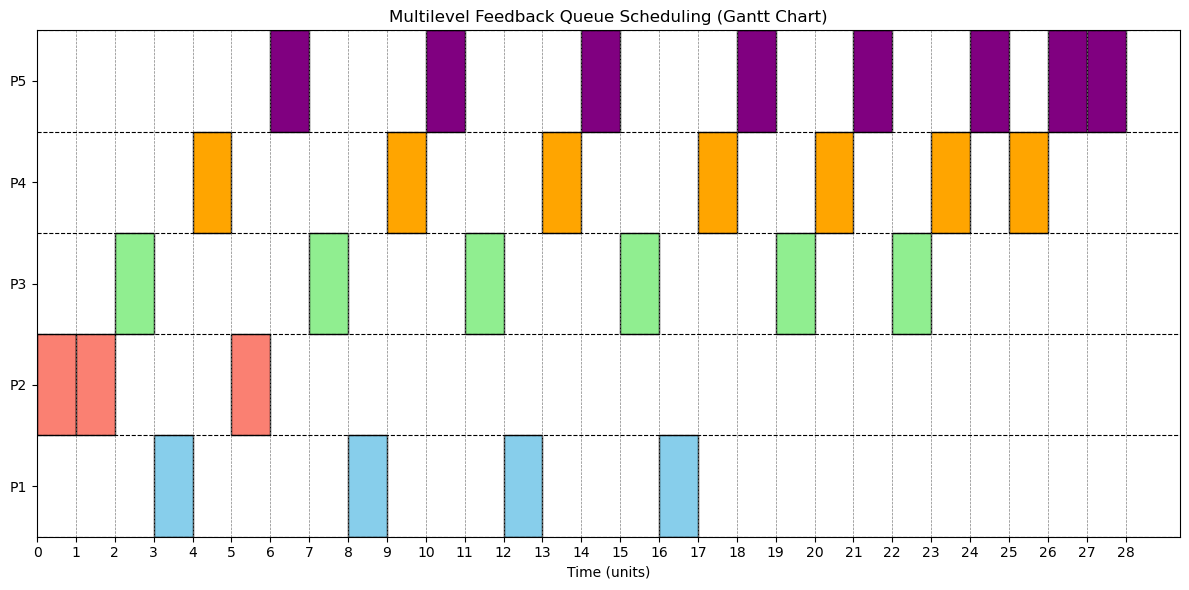


Final Process Times:
+-------+-------+---------+--------+-------+------+
|  PID  |  Arr  |  Burst  |  Comp  |  TAT  |  WT  |
+=======+=======+=========+========+=======+======+
|   1   |   3   |    4    |   17   |  14   |  10  |
+-------+-------+---------+--------+-------+------+
|   2   |   0   |    3    |   6    |   6   |  3   |
+-------+-------+---------+--------+-------+------+
|   3   |   2   |    6    |   23   |  21   |  15  |
+-------+-------+---------+--------+-------+------+
|   4   |   4   |    7    |   26   |  22   |  15  |
+-------+-------+---------+--------+-------+------+
|   5   |   6   |    8    |   28   |  22   |  14  |
+-------+-------+---------+--------+-------+------+


In [2]:
from tabulate import tabulate
import matplotlib.pyplot as plt

class Process:
    def __init__(self, pid, arrival_time, burst_time, priority):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.remaining_time = burst_time
        self.completion_time = 0
        self.start_times = []  # Track start times for Gantt chart
        self.end_times = []    # Track end times for Gantt chart

def multilevel_feedback_queue(processes, time_quantum1, time_quantum2, time_quantum3):
    queue1 = []
    queue2 = []
    queue3 = []
    time = 0
    completed_processes = []

    # Sort processes by arrival time
    processes.sort(key=lambda p: p.arrival_time)

    while processes or queue1 or queue2 or queue3:
        # Move processes to queue 1 when they arrive
        while processes and processes[0].arrival_time <= time:
            queue1.append(processes.pop(0))

        # Print state of queues
        print(f"\nTime {time}:")
        print("Queue 1:", [p.pid for p in queue1])
        print("Queue 2:", [p.pid for p in queue2])
        print("Queue 3:", [p.pid for p in queue3])

        if queue1:
            current_process = queue1.pop(0)
            current_process.start_times.append(time)
            execution_time = min(current_process.remaining_time, time_quantum1)
            time += execution_time
            current_process.remaining_time -= execution_time
            current_process.end_times.append(time)

            # Check if the process needs to move to a lower-priority queue
            if current_process.remaining_time > 0:
                if queue1 or queue2 or queue3 or (processes and processes[0].arrival_time <= time):
                    queue2.append(current_process)
                else:
                    queue1.append(current_process)  # Stay in the same queue if no other process is waiting
            else:
                current_process.completion_time = time
                completed_processes.append(current_process)

        elif queue2:
            current_process = queue2.pop(0)
            current_process.start_times.append(time)
            execution_time = min(current_process.remaining_time, time_quantum2)
            time += execution_time
            current_process.remaining_time -= execution_time
            current_process.end_times.append(time)

            # Check if the process needs to move to a lower-priority queue
            if current_process.remaining_time > 0:
                if queue1 or queue2 or queue3 or (processes and processes[0].arrival_time <= time):
                    queue3.append(current_process)
                else:
                    queue2.append(current_process)  # Stay in the same queue if no other process is waiting
            else:
                current_process.completion_time = time
                completed_processes.append(current_process)

        elif queue3:
            current_process = queue3.pop(0)
            current_process.start_times.append(time)
            execution_time = min(current_process.remaining_time, time_quantum3)
            time += execution_time
            current_process.remaining_time -= execution_time
            current_process.end_times.append(time)

            if current_process.remaining_time > 0:
                queue3.append(current_process)  # Stay in queue 3
            else:
                current_process.completion_time = time
                completed_processes.append(current_process)

        elif processes:
            time = processes[0].arrival_time

    # Sort processes by PID for consistent order
    completed_processes.sort(key=lambda p: p.pid)

    # Plot Gantt chart
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ["skyblue", "salmon", "lightgreen", "orange", "purple"]

    for i, p in enumerate(completed_processes):
        y_position = i  # Correct y-position for each process
        for start, end in zip(p.start_times, p.end_times):
            ax.barh(
                y_position,
                end - start,
                left=start,
                color=colors[i % len(colors)],
                edgecolor="black",
                height=1.0,  # Full height to touch top and bottom lines
            )
        # Add a horizontal line at the top of each process bar
        ax.axhline(y=y_position + 0.5, color="black", linestyle="--", linewidth=0.8)

    # Add horizontal line for x-axis (bottom line)
    ax.axhline(y=-0.5, color="black", linestyle="--", linewidth=0.8)

    # Draw vertical grid lines for every unit on the x-axis
    ax.set_xticks(range(0, time + 1))
    ax.grid(axis='x', linestyle='--', linewidth=0.5, which='both', color="grey")

    # Configure Y-axis to list processes by PID
    ax.set_yticks(range(len(completed_processes)))
    ax.set_yticklabels([f"P{p.pid}" for p in completed_processes])

    ax.set_ylim(-0.5, len(completed_processes) - 0.5)
    ax.set_xlabel("Time (units)")
    ax.set_title("Multilevel Feedback Queue Scheduling (Gantt Chart)")
    plt.tight_layout()
    plt.show()


    # Calculate and display process times
    table = []
    for p in completed_processes:
        tat = p.completion_time - p.arrival_time
        wt = tat - p.burst_time
        table.append([p.pid, p.arrival_time, p.burst_time, p.completion_time, tat, wt])

    headers = ["PID", "Arr", "Burst", "Comp", "TAT", "WT"]
    print("\nFinal Process Times:")
    print(tabulate(table, headers=headers, tablefmt="grid", numalign="center", stralign="center"))

# Accept user input
def get_user_input():
    num_processes = int(input("Enter the number of processes: "))
    processes = []
    for i in range(num_processes):
        print(f"\nEnter details for Process {i + 1}:")
        pid = int(input("PID: "))
        arrival_time = int(input("Arrival Time: "))
        burst_time = int(input("Burst Time: "))
        priority = int(input("Priority (0 for this implementation): "))
        processes.append(Process(pid, arrival_time, burst_time, priority))
    return processes

# Main program
processes = get_user_input()
time_quantum1 = int(input("\nEnter Time Quantum for Queue 1: "))
time_quantum2 = int(input("Enter Time Quantum for Queue 2: "))
time_quantum3 = int(input("Enter Time Quantum for Queue 3: "))

multilevel_feedback_queue(processes, time_quantum1, time_quantum2, time_quantum3)

In [4]:
from tabulate import tabulate
import copy

class Process:
    def __init__(self, pid, arrival_time, burst_time, priority):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.remaining_time = burst_time
        self.completion_time = 0
        self.start_times = []
        self.end_times = []

def fcfs(processes):
    time = 0
    completed_processes = []
    
    processes.sort(key=lambda p: p.arrival_time)
    
    for p in processes:
        if time < p.arrival_time:
            time = p.arrival_time
        p.start_times.append(time)
        time += p.burst_time
        p.completion_time = time
        p.end_times.append(time)
        completed_processes.append(p)
    
    return completed_processes

def sjf(processes):
    time = 0
    completed_processes = []
    ready_queue = []
    
    processes.sort(key=lambda p: p.arrival_time)
    
    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))
        
        if ready_queue:
            ready_queue.sort(key=lambda p: p.burst_time)  # Sort by shortest job first
            p = ready_queue.pop(0)
            p.start_times.append(time)
            time += p.burst_time
            p.completion_time = time
            p.end_times.append(time)
            completed_processes.append(p)
        else:
            time = processes[0].arrival_time  # Move to next arrival time
    
    return completed_processes

def round_robin(processes, time_quantum):
    queue = []
    time = 0
    completed_processes = []
    
    processes.sort(key=lambda p: p.arrival_time)
    
    while processes or queue:
        while processes and processes[0].arrival_time <= time:
            queue.append(processes.pop(0))
        
        if queue:
            p = queue.pop(0)
            p.start_times.append(time)
            execution_time = min(p.remaining_time, time_quantum)
            time += execution_time
            p.remaining_time -= execution_time
            p.end_times.append(time)
            
            if p.remaining_time > 0:
                queue.append(p)  # Re-add to queue
            else:
                p.completion_time = time
                completed_processes.append(p)
        elif processes:
            time = processes[0].arrival_time
    
    return completed_processes

def priority_scheduling(processes):
    time = 0
    completed_processes = []
    ready_queue = []
    
    processes.sort(key=lambda p: p.arrival_time)
    
    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))
        
        if ready_queue:
            ready_queue.sort(key=lambda p: p.priority)  # Lower number = higher priority
            p = ready_queue.pop(0)
            p.start_times.append(time)
            time += p.burst_time
            p.completion_time = time
            p.end_times.append(time)
            completed_processes.append(p)
        else:
            time = processes[0].arrival_time
    
    return completed_processes

def calculate_times(completed_processes):
    table = []
    for p in completed_processes:
        tat = p.completion_time - p.arrival_time
        wt = tat - p.burst_time
        table.append([p.pid, p.arrival_time, p.burst_time, p.completion_time, tat, wt])
    return table

# Get user input
def get_user_input():
    num_processes = int(input("Enter the number of processes: "))
    processes = []
    for i in range(num_processes):
        print(f"\nEnter details for Process {i + 1}:")
        pid = int(input("PID: "))
        arrival_time = int(input("Arrival Time: "))
        burst_time = int(input("Burst Time: "))
        priority = int(input("Priority (Lower value = Higher priority): "))
        processes.append(Process(pid, arrival_time, burst_time, priority))
    return processes

# Main execution
processes = get_user_input()

time_quantum_rr = int(input("\nEnter Time Quantum for Round Robin: "))

# Run all scheduling algorithms
fcfs_processes = fcfs(copy.deepcopy(processes))
sjf_processes = sjf(copy.deepcopy(processes))
rr_processes = round_robin(copy.deepcopy(processes), time_quantum_rr)
priority_processes = priority_scheduling(copy.deepcopy(processes))

# Calculate results
fcfs_table = calculate_times(fcfs_processes)
sjf_table = calculate_times(sjf_processes)
rr_table = calculate_times(rr_processes)
priority_table = calculate_times(priority_processes)

# Display results
print("\n🔷 **FCFS Scheduling Results** 🔷")
print(tabulate(fcfs_table, headers=["PID", "Arr", "Burst", "Comp", "TAT", "WT"], tablefmt="grid"))

print("\n🔷 **SJF Scheduling Results** 🔷")
print(tabulate(sjf_table, headers=["PID", "Arr", "Burst", "Comp", "TAT", "WT"], tablefmt="grid"))

print("\n🔷 **Round Robin Scheduling Results** 🔷")
print(tabulate(rr_table, headers=["PID", "Arr", "Burst", "Comp", "TAT", "WT"], tablefmt="grid"))

print("\n🔷 **Priority Scheduling Results** 🔷")
print(tabulate(priority_table, headers=["PID", "Arr", "Burst", "Comp", "TAT", "WT"], tablefmt="grid"))


Enter the number of processes: 5

Enter details for Process 1:
PID: 1
Arrival Time: 3
Burst Time: 4
Priority (Lower value = Higher priority): 0

Enter details for Process 2:
PID: 2
Arrival Time: 0
Burst Time: 3
Priority (Lower value = Higher priority): 0

Enter details for Process 3:
PID: 3
Arrival Time: 2
Burst Time: 6
Priority (Lower value = Higher priority): 0

Enter details for Process 4:
PID: 4
Arrival Time: 4
Burst Time: 7
Priority (Lower value = Higher priority): 0

Enter details for Process 5:
PID: 5
Arrival Time: 6
Burst Time: 8
Priority (Lower value = Higher priority): 0

Enter Time Quantum for Round Robin: 1

🔷 **FCFS Scheduling Results** 🔷
+-------+-------+---------+--------+-------+------+
|   PID |   Arr |   Burst |   Comp |   TAT |   WT |
+=======+=======+=========+========+=======+======+
|     2 |     0 |       3 |      3 |     3 |    0 |
+-------+-------+---------+--------+-------+------+
|     3 |     2 |       6 |      9 |     7 |    1 |
+-------+-------+---------+-

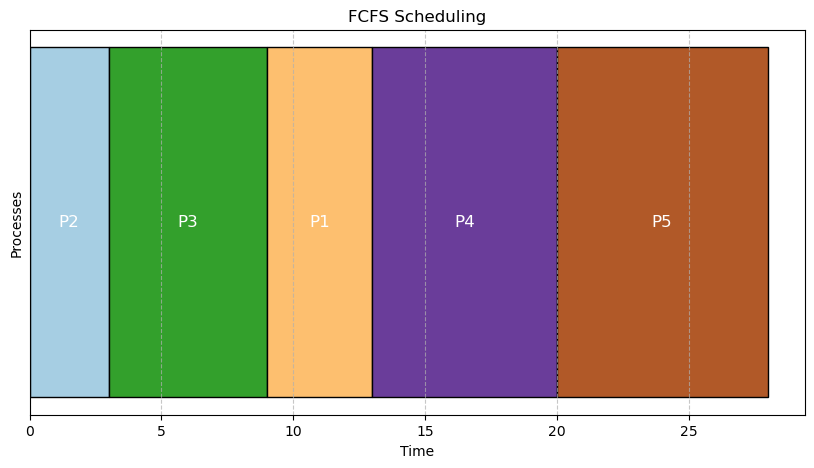

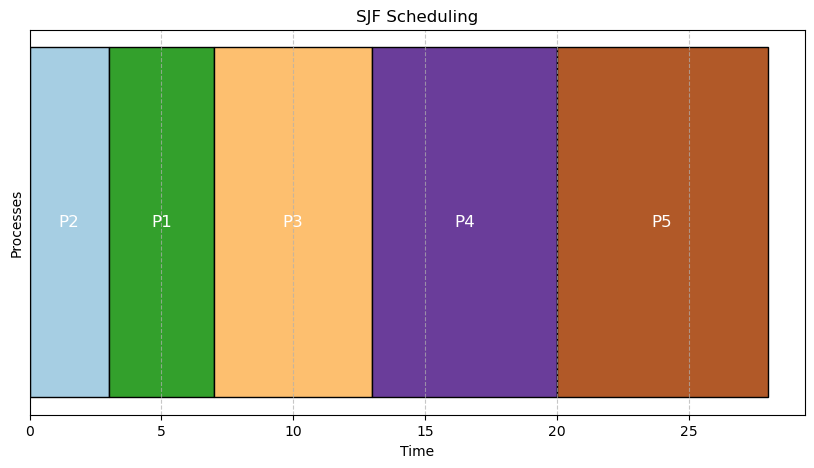

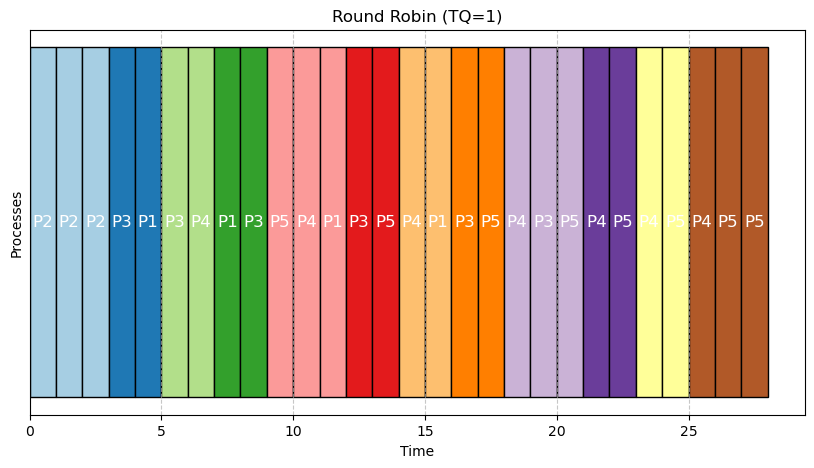

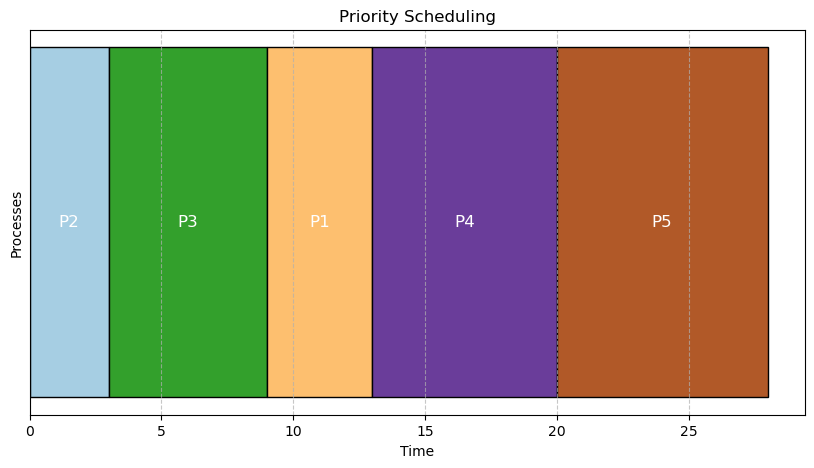

In [5]:
import matplotlib.pyplot as plt
import numpy as np

class Process:
    def __init__(self, pid, arrival_time, burst_time, priority):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.remaining_time = burst_time
        self.completion_time = 0
        self.start_times = []
        self.end_times = []

def plot_gantt_chart(schedules, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = plt.cm.Paired(np.linspace(0, 1, len(schedules)))
    
    for idx, (pid, start, end) in enumerate(schedules):
        ax.barh(y=0, width=end-start, left=start, color=colors[idx], edgecolor="black")
        ax.text((start+end)/2, 0, f"P{pid}", ha="center", va="center", color="white", fontsize=12)

    ax.set_xlabel("Time")
    ax.set_ylabel("Processes")
    ax.set_title(title)
    ax.set_yticks([])
    plt.grid(axis='x', linestyle="--", alpha=0.7)
    plt.show()

def fcfs_gantt(processes):
    time = 0
    schedules = []
    processes.sort(key=lambda p: p.arrival_time)

    for p in processes:
        if time < p.arrival_time:
            time = p.arrival_time
        schedules.append((p.pid, time, time + p.burst_time))
        time += p.burst_time

    plot_gantt_chart(schedules, "FCFS Scheduling")

def sjf_gantt(processes):
    time = 0
    schedules = []
    ready_queue = []
    processes.sort(key=lambda p: p.arrival_time)

    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))

        if ready_queue:
            ready_queue.sort(key=lambda p: p.burst_time)  
            p = ready_queue.pop(0)
            schedules.append((p.pid, time, time + p.burst_time))
            time += p.burst_time
        else:
            time = processes[0].arrival_time  

    plot_gantt_chart(schedules, "SJF Scheduling")

def rr_gantt(processes, time_quantum):
    queue = []
    time = 0
    schedules = []
    processes.sort(key=lambda p: p.arrival_time)

    while processes or queue:
        while processes and processes[0].arrival_time <= time:
            queue.append(processes.pop(0))

        if queue:
            p = queue.pop(0)
            execution_time = min(p.remaining_time, time_quantum)
            schedules.append((p.pid, time, time + execution_time))
            time += execution_time
            p.remaining_time -= execution_time
            
            if p.remaining_time > 0:
                queue.append(p)
            else:
                p.completion_time = time
        elif processes:
            time = processes[0].arrival_time

    plot_gantt_chart(schedules, f"Round Robin (TQ={time_quantum})")

def priority_gantt(processes):
    time = 0
    schedules = []
    ready_queue = []
    processes.sort(key=lambda p: p.arrival_time)

    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))

        if ready_queue:
            ready_queue.sort(key=lambda p: p.priority)  
            p = ready_queue.pop(0)
            schedules.append((p.pid, time, time + p.burst_time))
            time += p.burst_time
        else:
            time = processes[0].arrival_time  

    plot_gantt_chart(schedules, "Priority Scheduling")

# Get user input
num_processes = 5
processes = [
    Process(1, 3, 4, 0),
    Process(2, 0, 3, 0),
    Process(3, 2, 6, 0),
    Process(4, 4, 7, 0),
    Process(5, 6, 8, 0),
]

time_quantum_rr = 1

# Visualize Scheduling Algorithms
fcfs_gantt(processes.copy())
sjf_gantt(processes.copy())
rr_gantt(processes.copy(), time_quantum_rr)
priority_gantt(processes.copy())
